In [1]:
import sys
import cv2
import numpy as np
import random

from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

# Erode, Dilate

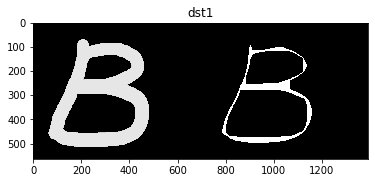

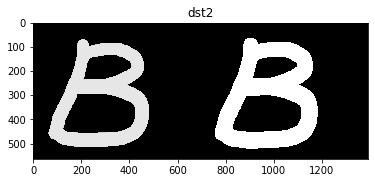

In [16]:
src = cv2.imread('letterb.png', cv2.IMREAD_GRAYSCALE)
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

dst1 = cv2.erode(src_bin, None)
for i in range(17) :
    dst1 = cv2.erode(dst1, None)
imshow("dst1", np.hstack((src, dst1)))

dst2 = cv2.dilate(src_bin, None)
for i in range(4) :
    dst2 = cv2.dilate(dst2, None)
imshow("dst2", np.hstack((src, dst2)))

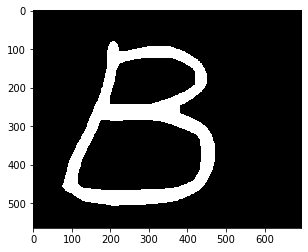

In [21]:
dst1 = cv2.erode(src_bin, None, iterations=10)
imshow("", dst1)

In [25]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))
print(kernel)

[[0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [1 1 1 1 1 1 1]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]]


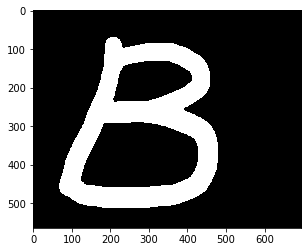

In [26]:
dst1 = cv2.erode(src_bin, kernel, iterations=1)
imshow("", dst1)

# Open, Close

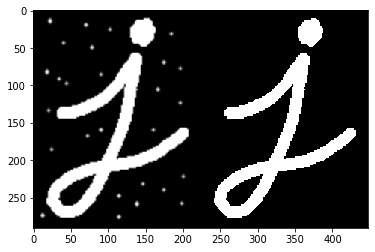

In [30]:
src = cv2.imread('open.png', cv2.IMREAD_GRAYSCALE)
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))
dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_OPEN, kernel)
imshow("", np.hstack((src, dst1)))

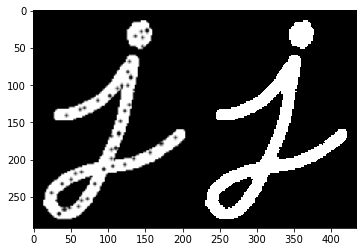

In [33]:
src = cv2.imread('close.png', cv2.IMREAD_GRAYSCALE)
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))
dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_CLOSE, kernel)
imshow("", np.hstack((src, dst1)))

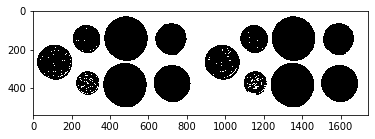

In [43]:
src = cv2.imread('coins.png', cv2.IMREAD_GRAYSCALE)
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

#src_bin = 255 - src_bin
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))
dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_CLOSE, kernel)
imshow("", np.hstack((src_bin, dst1)))

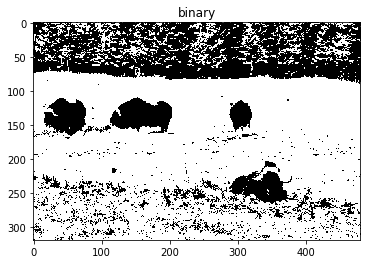

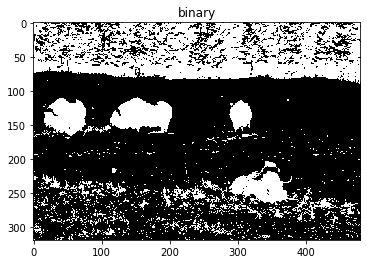

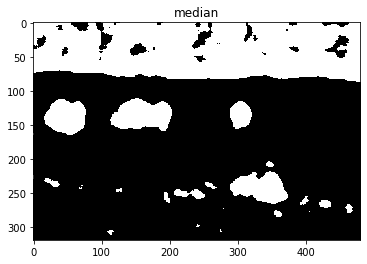

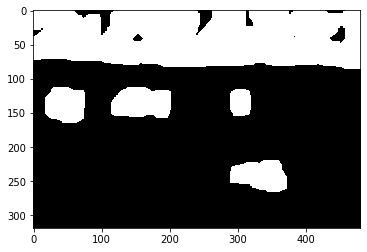

In [76]:
src = cv2.imread('cow.jpg', 0)

_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

imshow("binary", src_bin)
src_bin = 255 -src_bin 
imshow("binary", src_bin)

src_bin = cv2.medianBlur(src_bin, 11)
imshow("median", src_bin)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))

dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_ERODE, kernel, iterations=3)
dst1 = cv2.morphologyEx(dst1, cv2.MORPH_DILATE, None, iterations=8)

imshow("", dst1)


2894.0
1036.0
2572.5
3270.5
2.0
117.5
343.5
36052.0


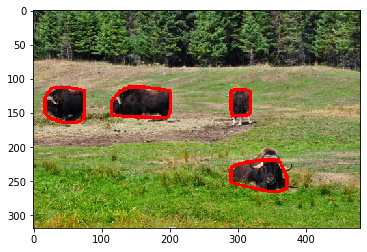

In [78]:
contours, hierarchy = cv2.findContours(dst1,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

src = cv2.imread('cow.jpg')

for contour in contours:
    if cv2.contourArea(contour) > 1000 and cv2.contourArea(contour) < 4000:
        hull = cv2.convexHull(contour)
        cv2.drawContours(src, [hull], 0,(0,0,255), 3)
        
imshow("", src)

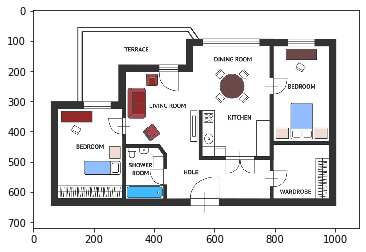

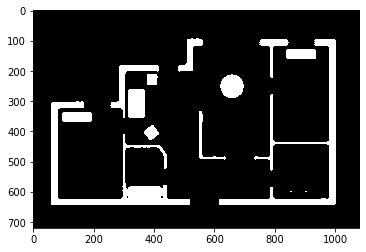

In [80]:
src = cv2.imread('draw.png', 0)
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

src_bin = 255 - src_bin
src_bin = cv2.medianBlur(src_bin, 11)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))

dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_ERODE, kernel)
dst1 = cv2.morphologyEx(dst1, cv2.MORPH_ERODE, kernel)
dst1 = cv2.morphologyEx(dst1, cv2.MORPH_DILATE, kernel)

src = cv2.imread('draw.png')
imshow("", src)
imshow("", dst1)

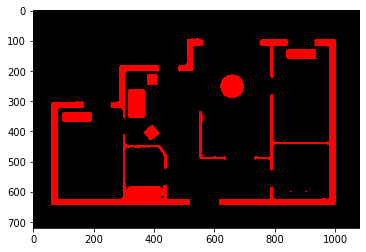

In [82]:
col = np.zeros((dst1.shape[0], dst1.shape[1], 3), dtype="uint8")
col[:,:,2] = dst1
imshow("", col)

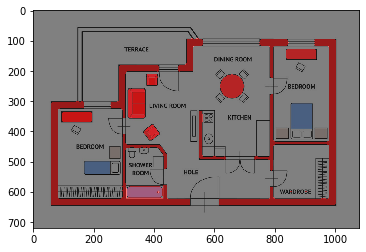

In [88]:
dst2 = cv2.addWeighted(src, 0.5, col, 0.5, 0.0)
imshow("", dst2)